# Simulation7

**Mengqi Liu**

**Aug 15, 2023**
___

 ## Recap
 - $N$: number of samples one time.
 - $M$: number of bins.
 - H0: $X\perp \!\!\! \perp Y \mid Z$, H1: $X\not \! \perp \!\!\! \perp Y \mid Z$
 - Methods:
   ($\tilde{Z}$ is the discretized $Z$, and the data belonging to the same group share the same $\tilde{Z}$.)
   - "Linear_reg_y": regress $Y$ on $1,X,\tilde{Z}$ and take the *absolute* coefficient of $X$ as the test statistic.
   - "Linear_reg_x": regress $X$ on $1,Y,\tilde{Z}$ and take the *absolute* coefficient of $Y$ as the test statistic.
   - "Double_reg": regress $Y$ on $\tilde{Z}$ and regress $X$ on $1,\tilde{Z}$ separately. Take the *absolute* correlation between residuals from two linear regressions as the test statistic.
   - "Linear_reg_y_z": regress $Y$ on $1,X,Z$ and take the *absolute* coefficient of $X$ as the test statistic.
   - "Linear_reg_x_z": regress $X$ on $1,Y,Z$ and take the *absolute* coefficient of $Y$ as the test statistic.
   - "Double_reg_z": regress $Y$ on $Z$ and regress $X$ on $1,Z$ separately. Take the *absolute* correlation between residuals from two linear regressions as the test statistic.

- $\alpha=0.05$

- $X = f_x(Z) + \epsilon$, $Y = f_y(Z) + \epsilon$

- Noise $\epsilon$:
  - various $a$
  - H0:
    - normal: $N(Z, a)$
    - skewed_normal: $N(Z, a)$
- $N=100, Z\sim \textrm{Unif}([0,1))$, $M \in \{2, 5, 10, 16, 25, 50\}$.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

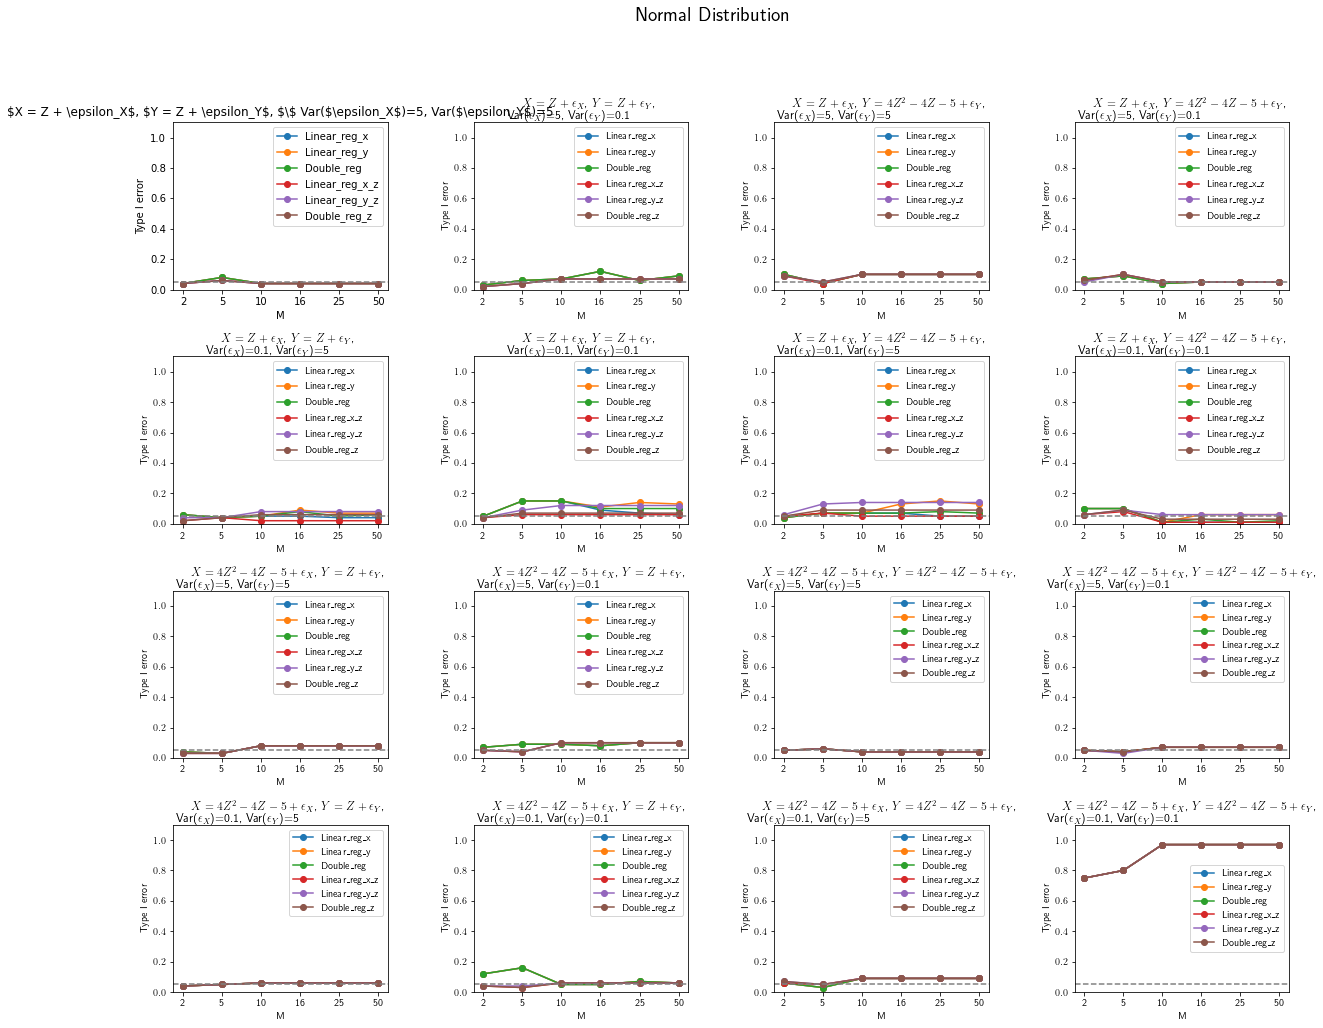

In [2]:
types = "normal"
hs = 'h0'
vxs = [5, 0.1]
vys = [5, 0.1]
xfuns = ['$X = Z + \epsilon_X$', '$X = 4Z^2 - 4Z-5 + \epsilon_X$']
yfuns = ['$Y = Z + \epsilon_Y$', '$Y = 4Z^2 - 4Z-5  + \epsilon_Y$']
plt.figure(figsize=(20, 16))
plt.subplots_adjust(wspace=.4, hspace=.4)
for xf in range(2):
    for yf in range(2):
        for vx1 in range(len(vxs)):
            for vy1 in range(len(vys)):
                plt.subplot(4, 4, xf*8+vx1*4+yf*2+vy1+1)
                result = pd.read_csv("./results/result_z/result_55_x_func_"+str(xf)+"_"+str(yf)+"_var_"+str(vxs[vx1])+"_"+str(vys[vy1])+"_"+hs+"_"+types+".csv", index_col=0)
                result = result.iloc[:,:]
                plt.plot(result.T, '-o')
                plt.xlabel("M")
                if hs == "h0":
                    plt.ylabel("Type I error")
                else:
                    plt.ylabel("power")
                plt.legend(result.index)
                plt.ylim([0, 1.1])
                plt.axhline(y=0.05, color='grey', linestyle='--')
                plt.rcParams['text.usetex'] = True
                plt.title(r"{}, {}, $\\$ Var($\epsilon_X$)={}, Var($\epsilon_Y$)={}".format(xfuns[xf], yfuns[yf], vxs[vx1], vys[vy1]))
fig = plt.gcf()
fig.suptitle("Normal Distribution", fontsize=20)
plt.show()

## Different distribution:

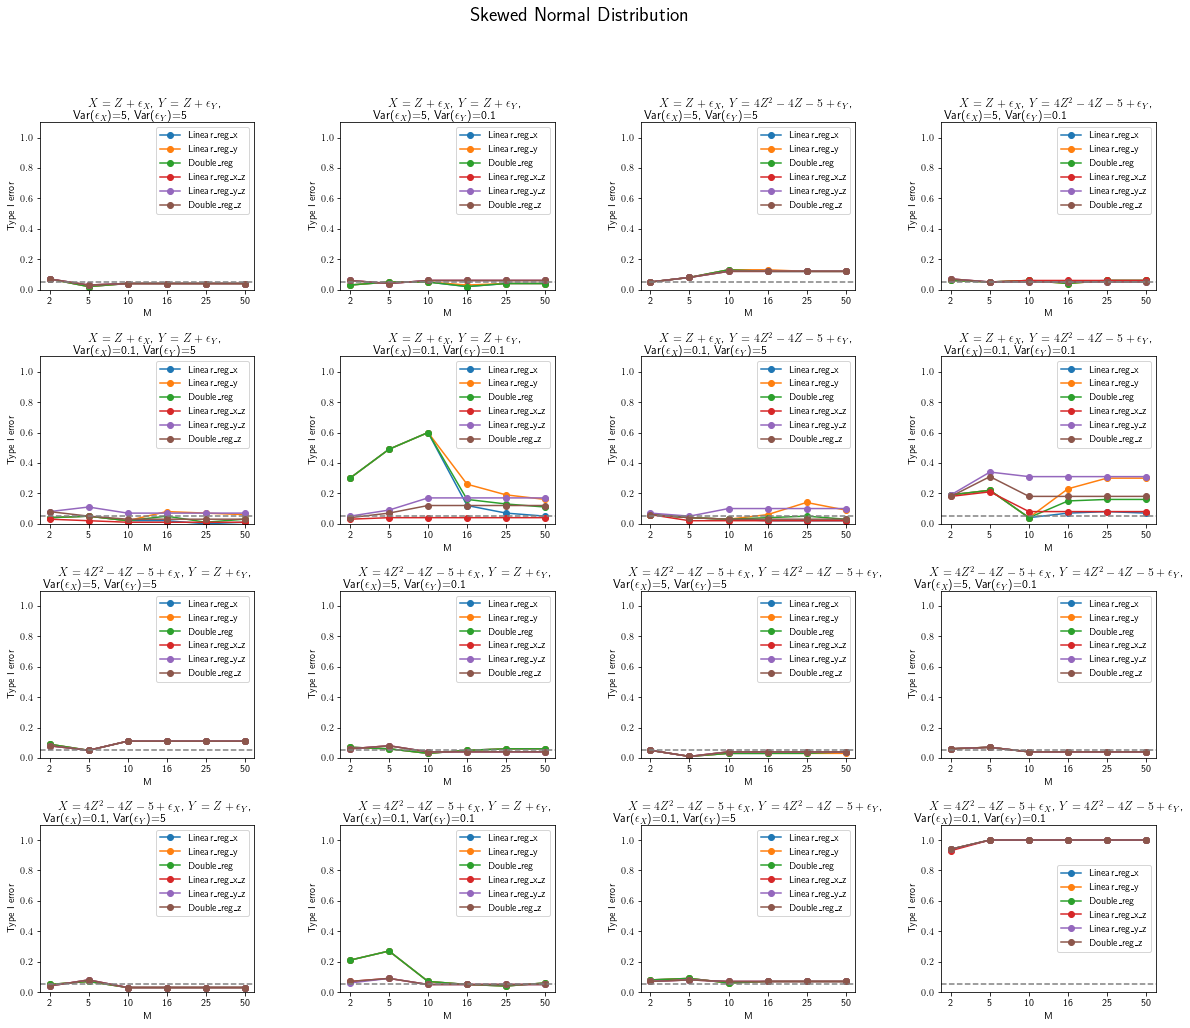

In [136]:
types = "skewed_normal"
hs = 'h0'
vxs = [5, 0.1]
vys = [5, 0.1]
xfuns = ['$X = Z + \epsilon_X$', '$X = 4Z^2 - 4Z-5 + \epsilon_X$']
yfuns = ['$Y = Z + \epsilon_Y$', '$Y = 4Z^2 - 4Z-5 + \epsilon_Y$']
plt.figure(figsize=(20, 16))
plt.subplots_adjust(wspace=.4, hspace=.4)
for xf in range(2):
    for yf in range(2):
        for vx1 in range(len(vxs)):
            for vy1 in range(len(vys)):
                plt.subplot(4, 4, xf*8+vx1*4+yf*2+vy1+1)
                result = pd.read_csv("./results/result_z/result_55_x_func_"+str(xf)+"_"+str(yf)+"_var_"+str(vxs[vx1])+"_"+str(vys[vy1])+"_"+hs+"_"+types+".csv", index_col=0)
                result = result.iloc[:,:]
                plt.plot(result.T, '-o')
                plt.xlabel("M")
                if hs == "h0":
                    plt.ylabel("Type I error")
                else:
                    plt.ylabel("power")
                plt.legend(result.index)
                plt.ylim([0, 1.1])
                plt.axhline(y=0.05, color='grey', linestyle='--')
                plt.rcParams['text.usetex'] = True
                plt.title(r"{}, {}, $\\$ Var($\epsilon_X$)={}, Var($\epsilon_Y$)={}".format(xfuns[xf], yfuns[yf], vxs[vx1], vys[vy1]))
fig = plt.gcf()
fig.suptitle("Skewed Normal Distribution", fontsize=20)
plt.show()

## Different scale:

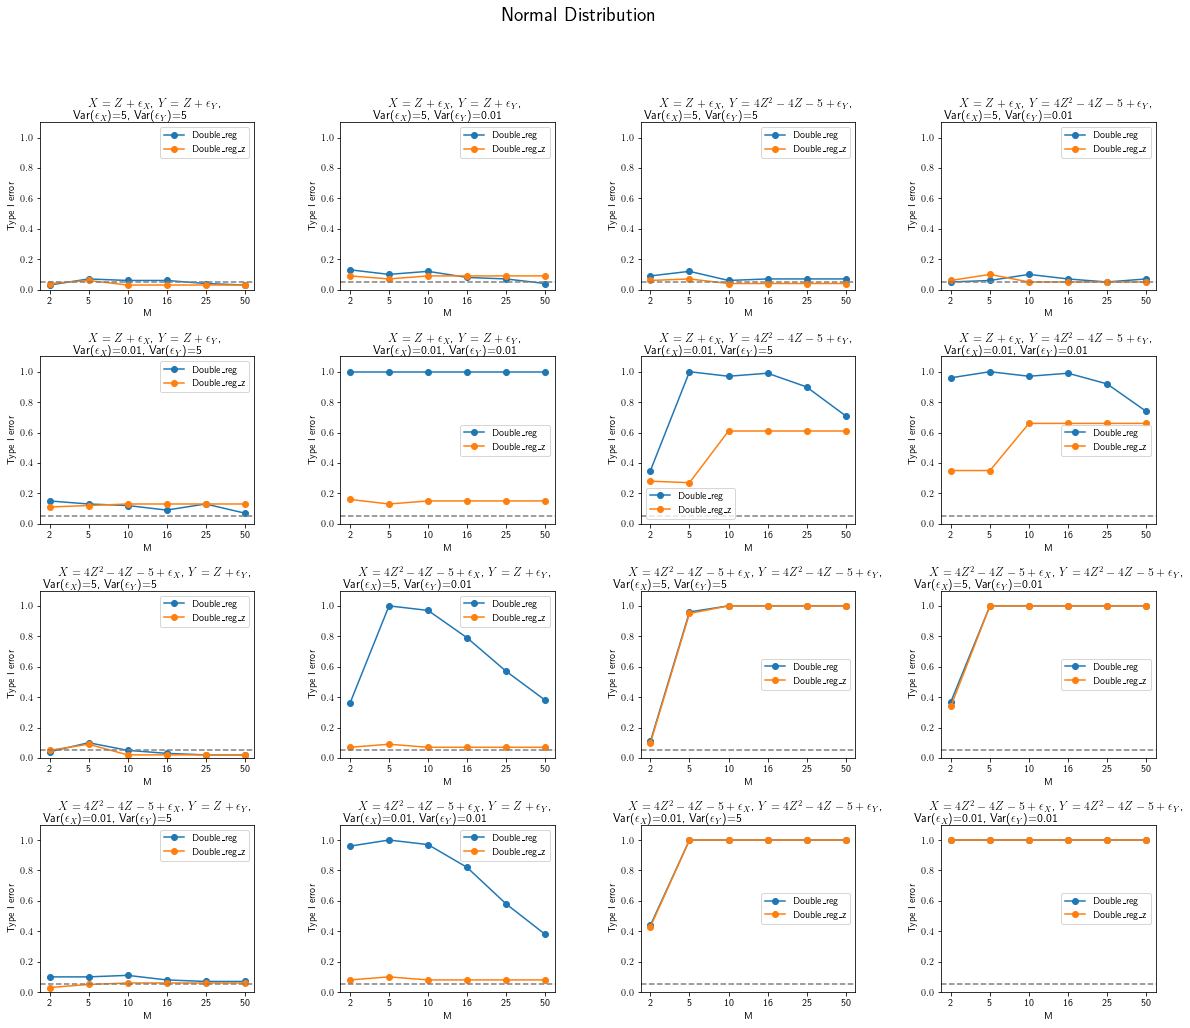

In [142]:
types = "normal"
hs = 'h0'
vxs = [5, 0.01]
vys = [5, 0.01]
xfuns = ['$X = Z + \epsilon_X$', '$X = 4Z^2 - 4Z-5 + \epsilon_X$']
yfuns = ['$Y = Z + \epsilon_Y$', '$Y = 4Z^2 - 4Z-5+ \epsilon_Y$']
plt.figure(figsize=(20, 16))
plt.subplots_adjust(wspace=.4, hspace=.4)
for xf in range(2):
    for yf in range(2):
        for vx1 in range(len(vxs)):
            for vy1 in range(len(vys)):
                plt.subplot(4, 4, xf*8+vx1*4+yf*2+vy1+1)
                result = pd.read_csv("./results/result_z/result_552_x_func_"+str(xf)+"_"+str(yf)+"_var_"+str(vxs[vx1])+"_"+str(vys[vy1])+"_"+hs+"_"+types+".csv", index_col=0)
                result = result.iloc[[2,5],:]
                plt.plot(result.T, '-o')
                plt.xlabel("M")
                if hs == "h0":
                    plt.ylabel("Type I error")
                else:
                    plt.ylabel("power")
                plt.ylim([0, 1.1])
                plt.axhline(y=0.05, color='grey', linestyle='--')
                plt.legend(result.index)
                plt.rcParams['text.usetex'] = True
                plt.title(r"{}, {}, $\\$ Var($\epsilon_X$)={}, Var($\epsilon_Y$)={}".format(xfuns[xf], yfuns[yf], vxs[vx1], vys[vy1]))
fig = plt.gcf()
fig.suptitle("Normal Distribution", fontsize=20)
plt.show()

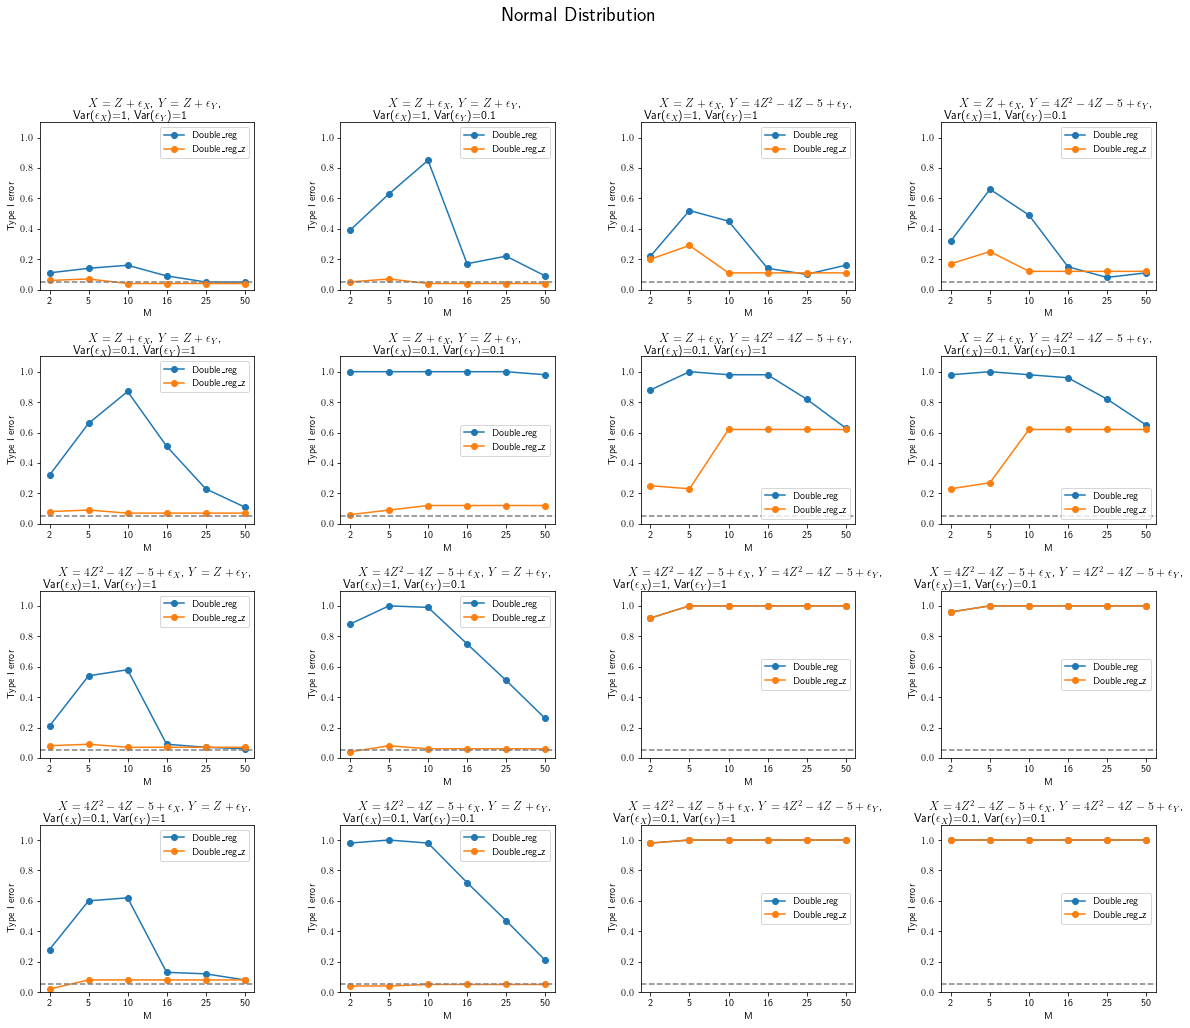

In [138]:
types = "normal"
hs = 'h0'
vxs = [1, 0.1]
vys = [1, 0.1]
xfuns = ['$X = Z + \epsilon_X$', '$X = 4Z^2 - 4Z-5 + \epsilon_X$']
yfuns = ['$Y = Z + \epsilon_Y$', '$Y = 4Z^2 - 4Z-5+ \epsilon_Y$']
plt.figure(figsize=(20, 16))
plt.subplots_adjust(wspace=.4, hspace=.4)
for xf in range(2):
    for yf in range(2):
        for vx1 in range(len(vxs)):
            for vy1 in range(len(vys)):
                plt.subplot(4, 4, xf*8+vx1*4+yf*2+vy1+1)
                result = pd.read_csv("./results/result_z/result_551_x_func_"+str(xf)+"_"+str(yf)+"_var_"+str(vxs[vx1])+"_"+str(vys[vy1])+"_"+hs+"_"+types+".csv", index_col=0)
                result = result.iloc[[2,5],:]
                plt.plot(result.T, '-o')
                plt.xlabel("M")
                if hs == "h0":
                    plt.ylabel("Type I error")
                else:
                    plt.ylabel("power")
                plt.ylim([0, 1.1])
                plt.axhline(y=0.05, color='grey', linestyle='--')
                plt.legend(result.index)
                plt.rcParams['text.usetex'] = True
                plt.title(r"{}, {}, $\\$ Var($\epsilon_X$)={}, Var($\epsilon_Y$)={}".format(xfuns[xf], yfuns[yf], vxs[vx1], vys[vy1]))
fig = plt.gcf()
fig.suptitle("Normal Distribution", fontsize=20)
plt.show()

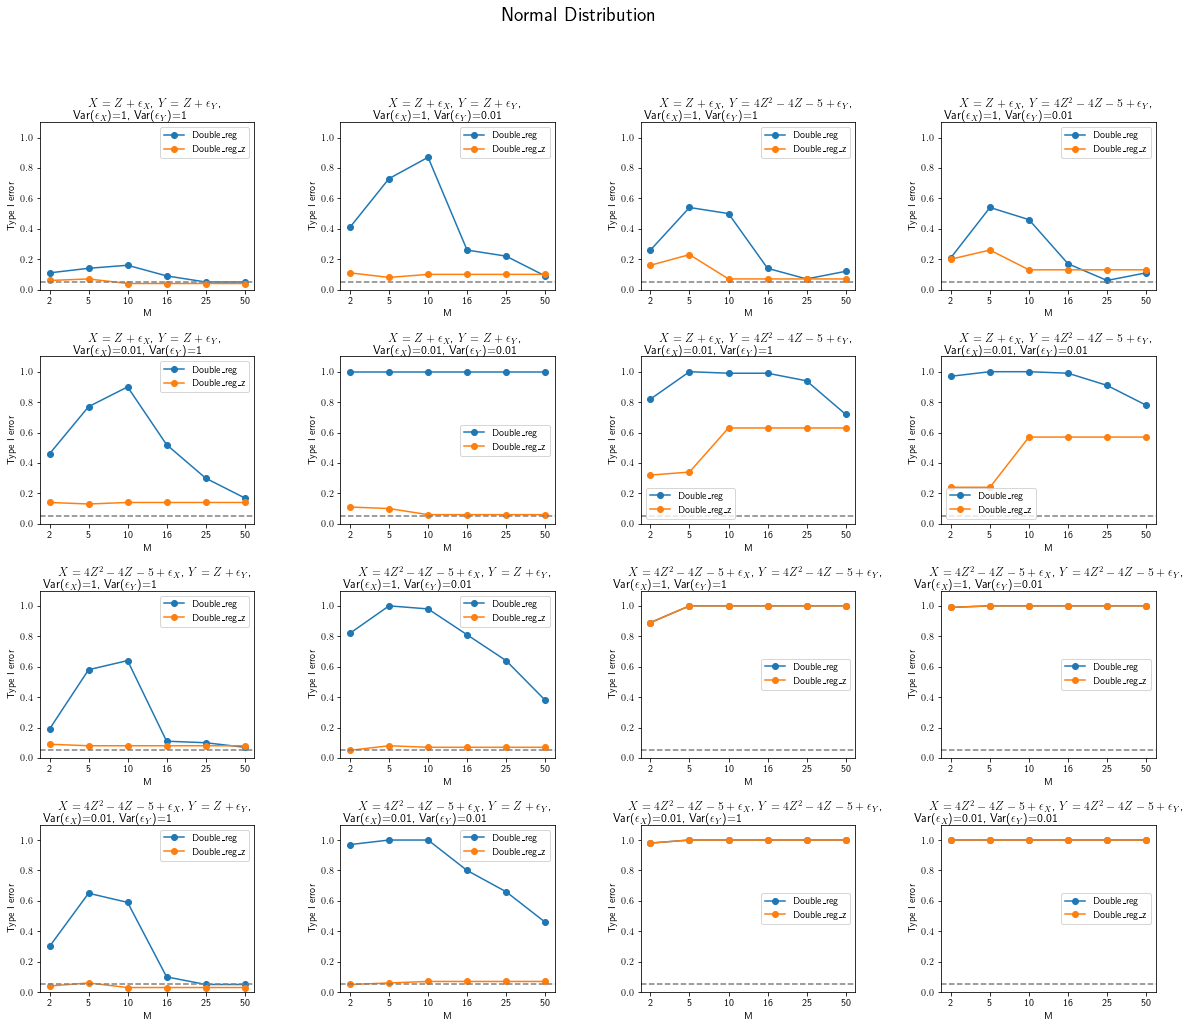

In [139]:
types = "normal"
hs = 'h0'
vxs = [1, 0.01]
vys = [1, 0.01]
xfuns = ['$X = Z + \epsilon_X$', '$X = 4Z^2 - 4Z-5 + \epsilon_X$']
yfuns = ['$Y = Z + \epsilon_Y$', '$Y = 4Z^2 - 4Z-5+ \epsilon_Y$']
plt.figure(figsize=(20, 16))
plt.subplots_adjust(wspace=.4, hspace=.4)
for xf in range(2):
    for yf in range(2):
        for vx1 in range(len(vxs)):
            for vy1 in range(len(vys)):
                plt.subplot(4, 4, xf*8+vx1*4+yf*2+vy1+1)
                result = pd.read_csv("./results/result_z/result_553_x_func_"+str(xf)+"_"+str(yf)+"_var_"+str(vxs[vx1])+"_"+str(vys[vy1])+"_"+hs+"_"+types+".csv", index_col=0)
                result = result.iloc[[2,5],:]
                plt.plot(result.T, '-o')
                plt.xlabel("M")
                if hs == "h0":
                    plt.ylabel("Type I error")
                else:
                    plt.ylabel("power")
                plt.ylim([0, 1.1])
                plt.axhline(y=0.05, color='grey', linestyle='--')
                plt.legend(result.index)
                plt.rcParams['text.usetex'] = True
                plt.title(r"{}, {}, $\\$ Var($\epsilon_X$)={}, Var($\epsilon_Y$)={}".format(xfuns[xf], yfuns[yf], vxs[vx1], vys[vy1]))
fig = plt.gcf()
fig.suptitle("Normal Distribution", fontsize=20)
plt.show()